In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [38]:
class LogisticRegression:
    w_ = np.array([0])
    b_ = 0

    def __init__(self):
        pass

    def sigmoid(self, z):
        result = 1 + math.exp(-z)
        result = 1/result
        return result

    def calculate_cost(self, X, y, w_in, b_in):
        cost = 0
        m, n = X.shape
        for i in range(m):
            z = np.dot(X[i], w_in) + b_in
            sigmoid_value = self.sigmoid(z)
            error = -y[i] * math.log(sigmoid_value) - (1-y[i]) * math.log(1 - sigmoid_value)
            error = error / m
            cost += error
        return cost

    def gradient_descent(self, X, y, w_in, b_in, alpha):
        m, n = X.shape
        w_updated = np.zeros((n, ))
        b_updated = 0

        for j in range(n):
            error = 0
            for i in range(m):
                z = np.dot(X[i], w_in) + b_in
                y_hat = self.sigmoid(z)
                error += (y_hat - y[i]) * X[i][j]
            error = error / m
            w_j_updated = w_in[j] - alpha * error
            w_updated[j] = w_j_updated

        error = 0
        for i in range(m):
            z = np.dot(X[i], w_in) + b_in
            y_hat = self.sigmoid(z)
            error += (y_hat - y[i])
        error = error / m
        b_updated = b_in - alpha * error

        return w_updated, b_updated

    def fit(self, X, y, iterations=1000, alpha=0.001, showing_result_interval=100):
        m, n = X.shape
        w_in = np.zeros((n,))
        b_in = 0
        cost = 0
        curr_itr = 1
        h_costs = []
        while curr_itr <= iterations:
            # calculate the cost
            cost = self.calculate_cost(X, y, w_in, b_in)
            h_costs.append(cost)

            # perform gradient descent algorithm
            w_in, b_in = self.gradient_descent(X, y, w_in, b_in, alpha)

            if curr_itr%showing_result_interval == 0:
                print(f"# of iteration: {curr_itr} :: cost: {cost}")
            curr_itr += 1

        self.w_ = w_in
        self.b_ = b_in
        print(f"final values of w: {w_in} :: final value of b: {b_in}")
        return (w_in, b_in), h_costs

    def predict(self, X):
        m, n = X.shape
        y_predict = np.zeros((m, ))
        for i in range(m):
            z = np.dot(X[i], self.w_) + self.b_
            prediction = self.sigmoid(z)
            y_predict[i] = prediction
        return y_predict

In [39]:
X = np.c_[np.array([1, 2, 3, 4, 5]), np.array([5, 4, 3, 2, 1])]
y = np.array([0, 0, 1, 1, 1])

iterations = 5000
alpha = 0.001

In [40]:
lr = LogisticRegression()
regression_line, h_costs = lr.fit(X, y, iterations, alpha)

# of iteration: 100 :: cost: 0.6161925352756333
# of iteration: 200 :: cost: 0.5574162153262072
# of iteration: 300 :: cost: 0.5106189768032942
# of iteration: 400 :: cost: 0.4721635804149382
# of iteration: 500 :: cost: 0.4399362573394806
# of iteration: 600 :: cost: 0.41255095808178355
# of iteration: 700 :: cost: 0.3890202243760772
# of iteration: 800 :: cost: 0.36860578342714606
# of iteration: 900 :: cost: 0.3507404704012206
# of iteration: 1000 :: cost: 0.3349812773719446
# of iteration: 1100 :: cost: 0.3209780588971798
# of iteration: 1200 :: cost: 0.30845135466948154
# of iteration: 1300 :: cost: 0.2971761429321386
# of iteration: 1400 :: cost: 0.2869697185821006
# of iteration: 1500 :: cost: 0.27768254427274325
# of iteration: 1600 :: cost: 0.2691912853490273
# of iteration: 1700 :: cost: 0.26139346688993687
# of iteration: 1800 :: cost: 0.2542033452128952
# of iteration: 1900 :: cost: 0.24754869484497657
# of iteration: 2000 :: cost: 0.24136829009442576
# of iteration: 2100 :

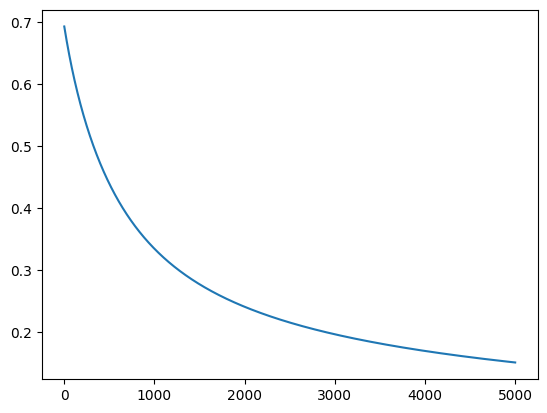

In [41]:
plt.plot(h_costs)

In [43]:
predictions = lr.predict(X)

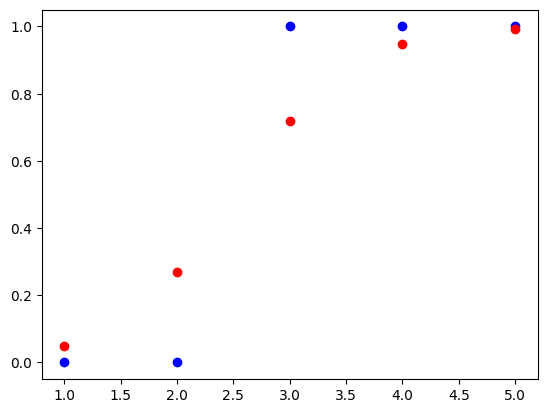

In [46]:
x_axis = np.array(list(range(1, X.shape[0]+1)))
plt.scatter(x_axis, y, c='blue')
plt.scatter(x_axis, predictions, c='red')
plt.show()

In [51]:
iterations = 100000
alpha = 0.001
showing_result_interval = 10000

lr = LogisticRegression()
regression_line, h_costs = lr.fit(X, y, iterations, alpha, showing_result_interval)

# of iteration: 10000 :: cost: 0.10411301939489424
# of iteration: 20000 :: cost: 0.06825696191003887
# of iteration: 30000 :: cost: 0.05161272950981103
# of iteration: 40000 :: cost: 0.041625363430753994
# of iteration: 50000 :: cost: 0.03489468629917636
# of iteration: 60000 :: cost: 0.03003370446404907
# of iteration: 70000 :: cost: 0.02635389550359487
# of iteration: 80000 :: cost: 0.023470415143308058
# of iteration: 90000 :: cost: 0.021150035026661403
# of iteration: 100000 :: cost: 0.019242757920279487
final values of w: [ 3.48454469 -2.54159933] :: final value of b: 0.15715755981231508


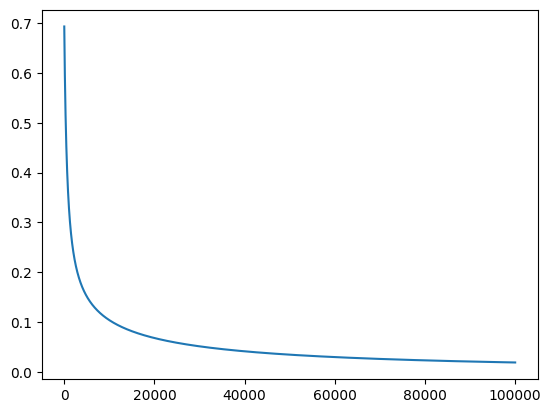

In [52]:
plt.plot(h_costs)

In [53]:
predictions = lr.predict(X)

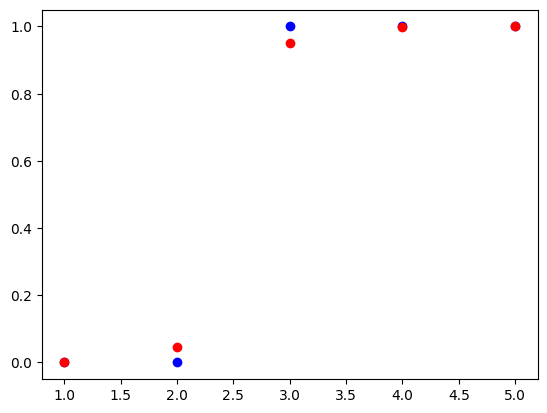

In [54]:
x_axis = np.array(list(range(1, X.shape[0]+1)))
plt.scatter(x_axis, y, c='blue')
plt.scatter(x_axis, predictions, c='red')
plt.show()